This notebook tests if the datassets created by the create_waveform_dataset_test.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [1]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
# from pnwstore.mseed import WaveformClient

## Verify the test datasets

### Verify the test datasets for HH/BH

Keys in HDF5 file:
 - data
<KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(4, 3, 14998), min=-9085.73, max=10700.50
 - 1: shape=(6, 3, 14998), min=-27406.51, max=4785.02
 - 10: shape=(11, 3, 14998), min=-31109.75, max=14581.18
 - 2: shape=(12, 3, 14998), min=-28677.23, max=36700.09
 - 3: shape=(5, 3, 14998), min=-1778.60, max=1604.46
 - 4: shape=(6, 3, 14998), min=-10832.28, max=31980.79
 - 5: shape=(7, 3, 14998), min=-23227.16, max=25182.08
 - 6: shape=(10, 3, 14998), min=-67357.90, max=61034.05
 - 7: shape=(8, 3, 14998), min=-18784.30, max=23044.08
 - 8: shape=(8, 3, 14998), min=-21682.23, max=21124.49
 - 9: shape=(6, 3, 14998), min=-25487.08, max=8897.49
samplewaveform shape: (3, 14998)


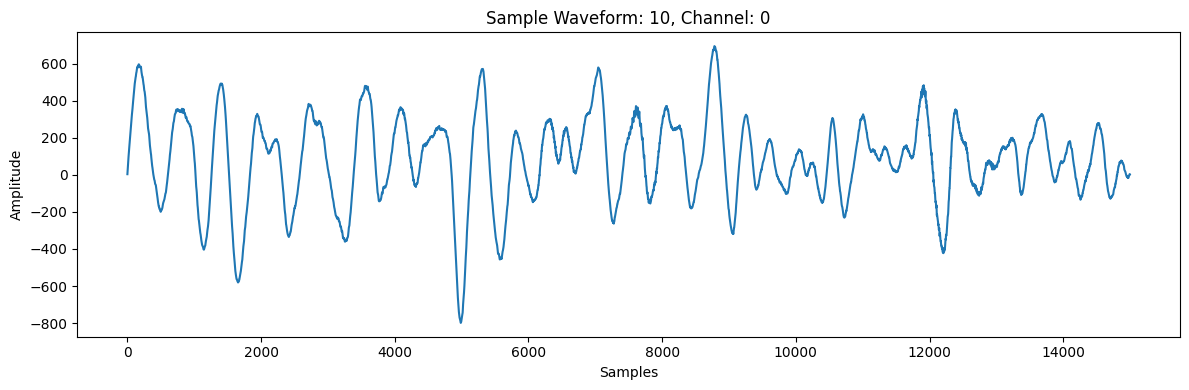

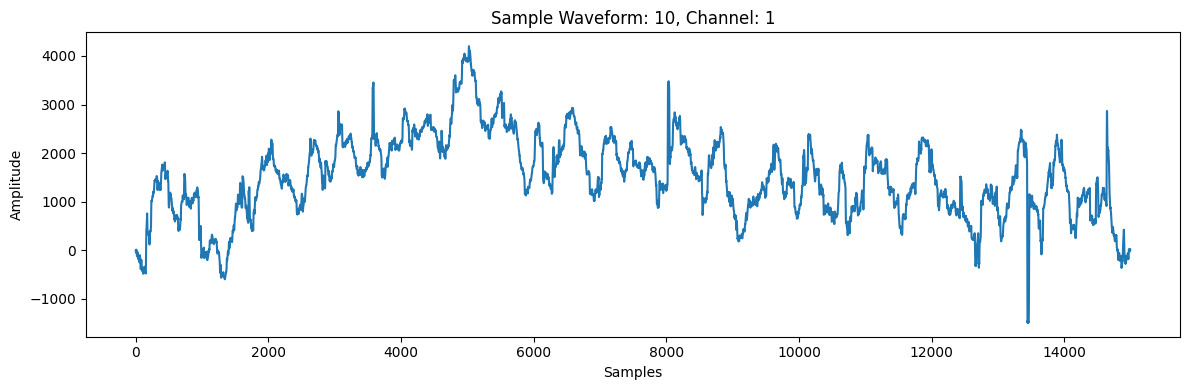

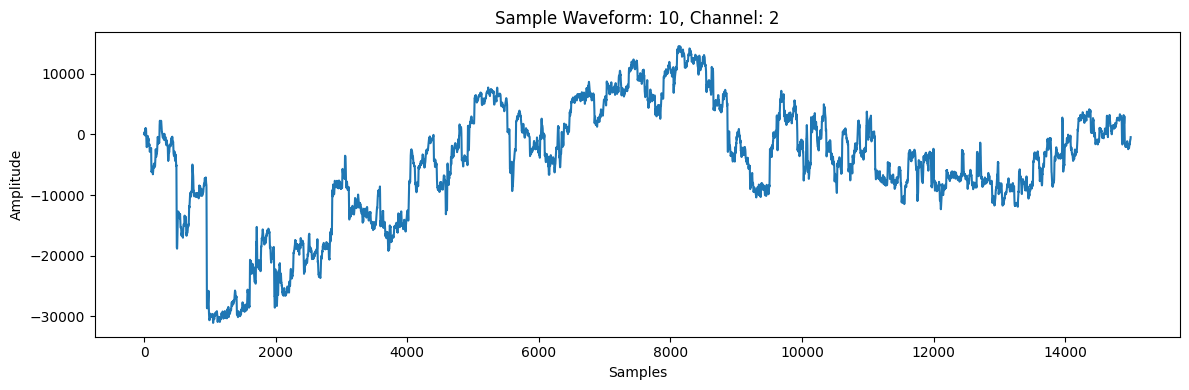

In [2]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_HH_BH_on_the_fly.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print(f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[2]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        

    

In [9]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_HH_BH_on_the_fly.csv')
test.iloc[50:][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
50,ev1262827366_425514,2010-01-07T01:22:46.425514Z,49.67603,-122.62066,3255.0,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"7$0,:3,:14998","7$0,:3,:14998",100,2010-01-07T01:21:56.425514Z,7413,6372.0,impulsive,impulsive
51,ev1262846500_554385,2010-01-07T06:41:40.554385Z,47.61945,-122.29584,17945.0,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"2$0,:3,:14998","2$0,:3,:14998",100,2010-01-07T06:40:50.554385Z,6277,NaN,impulsive,NaN
52,ev1262855102_887915,2010-01-07T09:05:02.887915Z,47.97134,-124.61241,31800.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"4$0,:3,:14998","4$0,:3,:14998",100,2010-01-07T09:04:12.887915Z,10152,7950.0,impulsive,impulsive
53,ev1262855102_887915,2010-01-07T09:05:02.887915Z,47.97134,-124.61241,31800.0,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"2$0,:3,:14998","2$0,:3,:14998",100,2010-01-07T09:04:12.887915Z,10470,NaN,impulsive,NaN
54,ev1262855714_424391,2010-01-07T09:15:14.424391Z,47.97078,-124.62573,35220.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"10$0,:3,:14998","10$0,:3,:14998",100,2010-01-07T09:14:24.424391Z,10130,7945.0,impulsive,impulsive
55,ev1262855714_424391,2010-01-07T09:15:14.424391Z,47.97078,-124.62573,35220.0,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"2$0,:3,:14998","2$0,:3,:14998",100,2010-01-07T09:14:24.424391Z,10450,NaN,impulsive,NaN
56,ev1262858255_860428,2010-01-07T09:57:35.860428Z,47.97195,-124.61423,31411.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"5$0,:3,:14998","5$0,:3,:14998",100,2010-01-07T09:56:45.860428Z,10146,7946.0,impulsive,impulsive
57,ev1262858255_860428,2010-01-07T09:57:35.860428Z,47.97195,-124.61423,31411.0,CN,BH,WSLR,NaN,50.126600,-122.921200,907.0,"0$0,:3,:14998","0$0,:3,:14998",100,2010-01-07T09:56:45.860428Z,11646,NaN,impulsive,NaN
58,ev1262858255_860428,2010-01-07T09:57:35.860428Z,47.97195,-124.61423,31411.0,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"8$0,:3,:14998","8$0,:3,:14998",100,2010-01-07T09:56:45.860428Z,10462,8122.0,impulsive,impulsive
59,ev1262858255_860428,2010-01-07T09:57:35.860428Z,47.97195,-124.61423,31411.0,UW,BH,YACT,NaN,45.932500,-122.419300,214.0,"5$0,:3,:14998","5$0,:3,:14998",100,2010-01-07T09:56:45.860428Z,11866,NaN,impulsive,NaN


In [8]:
len(test)

83

In [10]:
assoc_df = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/arrival_assoc_origin_2010_2015_reloc_cog_ver3.csv', index_col=0)
assoc_df.head()

,sta,pick_time,arid,iphase,prob,orid,phase,timeres,slatitude,slongitude,...,lon,depth,otime,nass,p_picks,s_picks,rms,nsphz,gap,algorithm
0,UW.PCMD,1.262305e+09,0,P,0.68,0,P,0.049,46.888962,-122.301483,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
1,UW.RVW,1.262305e+09,1,P,0.68,0,P,1.264,46.149750,-122.742996,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
2,UW.PCMD,1.262305e+09,2,S,0.68,0,S,-0.243,46.888962,-122.301483,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
3,UW.GNW,1.262305e+09,3,S,0.68,0,S,2.402,47.564130,-122.824980,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie
4,PB.B013,1.262305e+09,4,S,0.68,0,S,-0.651,47.813000,-122.910797,...,-122.16895,56.111,1.262305e+09,7,2,5,1.081,5.0,235.831208,genie


### Verify the test datasets for EH

Keys in HDF5 file:
 - data
f['data'].keys() <KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(28, 1, 14998), min=-5441.53, max=6794.99
 - 1: shape=(44, 1, 14998), min=-2412.63, max=3304.96
 - 10: shape=(43, 1, 14998), min=-6644.83, max=6889.11
 - 2: shape=(44, 1, 14998), min=-38004.95, max=14835.46
 - 3: shape=(44, 1, 14998), min=-25541.45, max=10659.71
 - 4: shape=(38, 1, 14998), min=-10491.40, max=2520.34
 - 5: shape=(47, 1, 14998), min=-2428.38, max=2054.78
 - 6: shape=(37, 1, 14998), min=-15931.30, max=12717.25
 - 7: shape=(45, 1, 14998), min=-10304.41, max=11613.59
 - 8: shape=(57, 1, 14998), min=-8268.68, max=7267.23
 - 9: shape=(40, 1, 14998), min=-5064.24, max=3664.54
samplewaveform shape: (1, 14998)


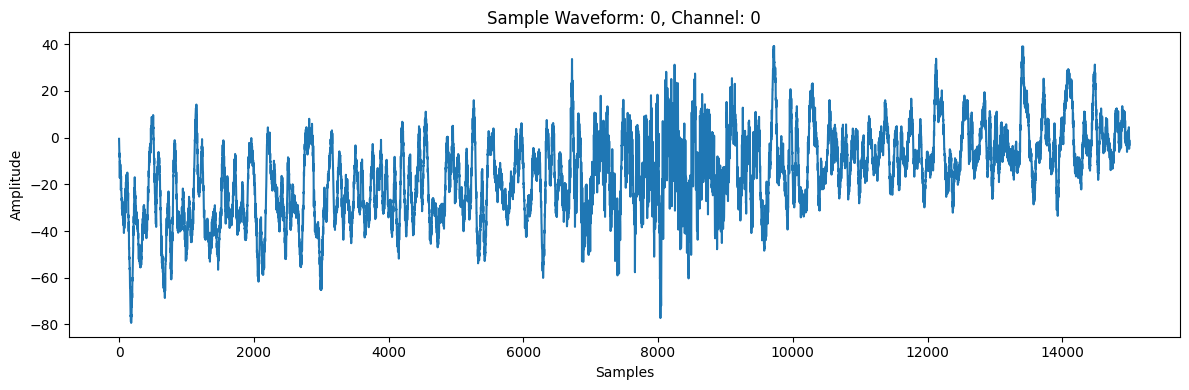

In [5]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_EH_test1.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print("f['data'].keys()",f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        


In [6]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_EH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B013,NaN,47.813000,-122.910797,75.3,"8$0,:1,:14998","8$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7635.0,NaN,impulsive,NaN
1,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B943,NaN,47.813202,-122.911301,84.2,"3$0,:1,:14998","3$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7650.0,NaN,impulsive,NaN
2,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,BOW,NaN,46.474831,-123.229301,870.0,"5$0,:1,:14998","5$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,8079.0,NaN,impulsive,NaN
3,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,PCMD,NaN,46.888962,-122.301483,239.0,"3$1,:1,:14998","3$1,:1,:14998",100,2010-01-01T00:14:27.262282Z,6601.0,5991.0,impulsive,impulsive
4,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,RVW,NaN,46.149750,-122.742996,504.0,"4$0,:1,:14998","4$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,NaN,7057.0,NaN,impulsive
5,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,BIB,NaN,49.410300,-123.310500,38.0,"10$0,:1,:14998","10$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9863.0,7772.0,impulsive,impulsive
6,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,GOBB,NaN,48.949300,-123.510500,173.0,"9$0,:1,:14998","9$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9425.0,7508.0,impulsive,impulsive
7,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,VDB,NaN,49.026100,-122.102800,404.0,"3$2,:1,:14998","3$2,:1,:14998",100,2010-01-01T00:15:59.375360Z,NaN,6577.0,NaN,impulsive
8,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,WPB,NaN,49.647800,-123.209400,260.0,"8$1,:1,:14998","8$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,10283.0,8011.0,impulsive,impulsive
9,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,PB,EH,B001,NaN,48.043072,-123.131409,237.0,"9$1,:1,:14998","9$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,8086.0,6763.0,impulsive,impulsive
